<a href="https://colab.research.google.com/github/Shreyash-Jagdale/Shreyash_Jagdale/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# mount colab to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import data (csv file) from the google drive
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Projects/Global Terrorism Data.csv',sep=',',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# get first 5 rows of the dataframe
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
# get last 5 rows of the dataframe
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


Preprocessing the data





In [8]:
# renaming the columns with appropriate column names
df.rename(columns = 
                  {'iyear':'year', 
                   'imonth':'month',
                   'iday':'day',
                   'country_txt' : 'country_name',
                   'region_txt' : 'region_name',
                   'natlty1_txt' : 'nationalityofvic',
                   'gname' : 'organisation',
                   'claimed' : 'claimedresp',
                   'propextent_txt' : 'propdamageextent',
                   'ishostkid' : 'victimkidnapped',
                   'ransom' : 'ransomdemanded',
                   }, inplace = True)

In [9]:
# checking for the null values
df.isnull().sum()

eventid            0
year               0
month              0
day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [10]:
# assign the levels of the variable success ( did attackers succeeded or failed)
x=df['success']
y=x.replace(1,'succeeded')
df['success']=y.replace(0,'failed')

Analysis and Visualization of Data



In [11]:
# summary of number citizens killed and wounded
df[['nkill','nkillter','nwound']].describe()

,nkill,nkillter,nwound
count,171378.000000,114733.000000,165380.000000
mean,2.403272,0.508058,3.167668
std,11.545741,4.199937,35.949392
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000
max,1570.000000,500.000000,8191.000000


In [12]:
# get yearly number of attcks 
year_wise_attacks=pd.DataFrame(df.year.value_counts().reset_index())
year_wise_attacks.columns=['year','no of attacks']
year_wise_attacks.head(3)

,year,no of attacks
0,2014,16903
1,2015,14965
2,2016,13587


Text(0.5, 1.0, 'Year wise attacks')

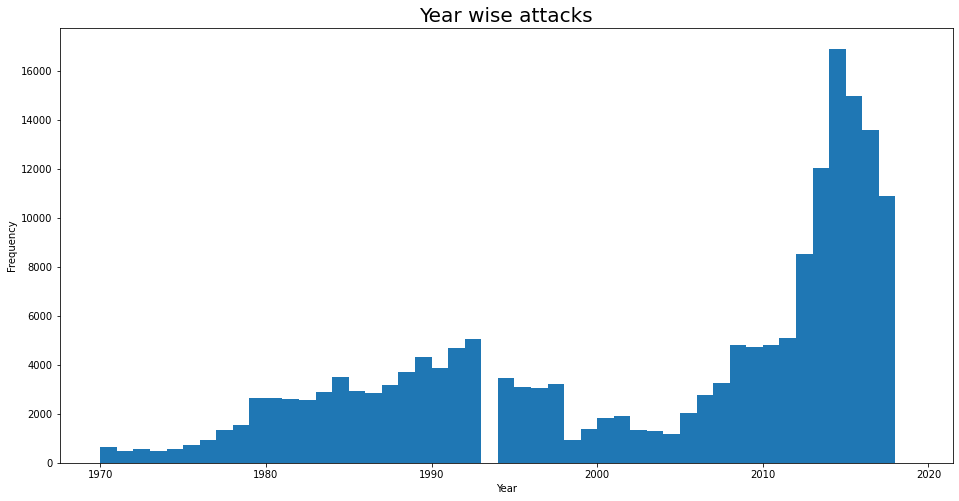

In [13]:
# to visualize above dataframe using Histogram

bins=range(1970,2020)
plt.figure(figsize=(16,8))
plt.hist(df['year'],bins,alpha=1,rwidth=2)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year wise attacks',fontsize=20)

Before 2000 the frequency of the attacks was increasing very slowly.After that it decreased to some extend but since 2005 it has increased very sharply


In [14]:
# to know number of attacks country wise
country_wise_attacks=pd.DataFrame(df.country_name.value_counts().reset_index())
country_wise_attacks.columns=['country','no of attacks']
top_10=country_wise_attacks.head(10)
top_10

,country,no of attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


Text(0.5, 1.0, 'Top 10 attcked countries')

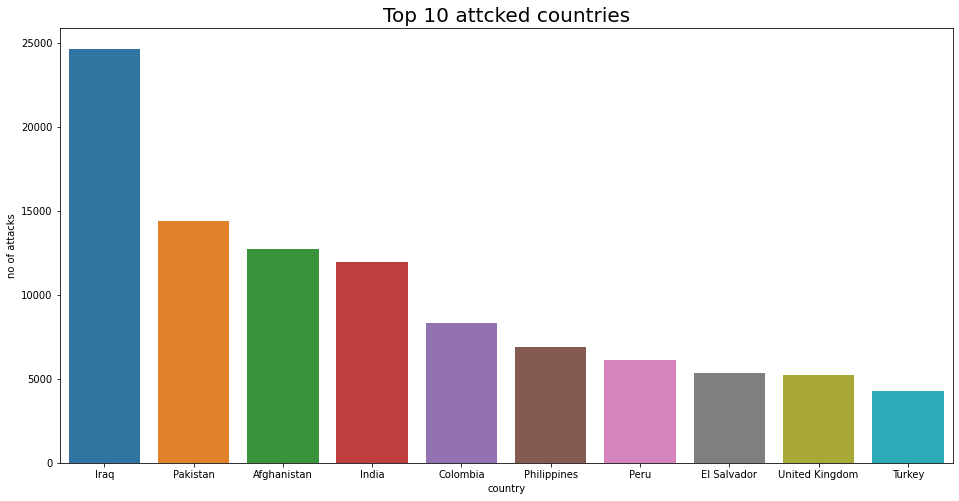

In [15]:
# to visualize above dataframe using barplot
plt.figure(figsize=(16,8))
sns.barplot(x=top_10['country'],y=top_10['no of attacks'])
plt.title('Top 10 attcked countries',fontsize=20)

Iraq is the country with the most number of terrorist attacks followed by Pakistan and Afghanistan

Text(0.5, 1.0, 'Region wise attacks')

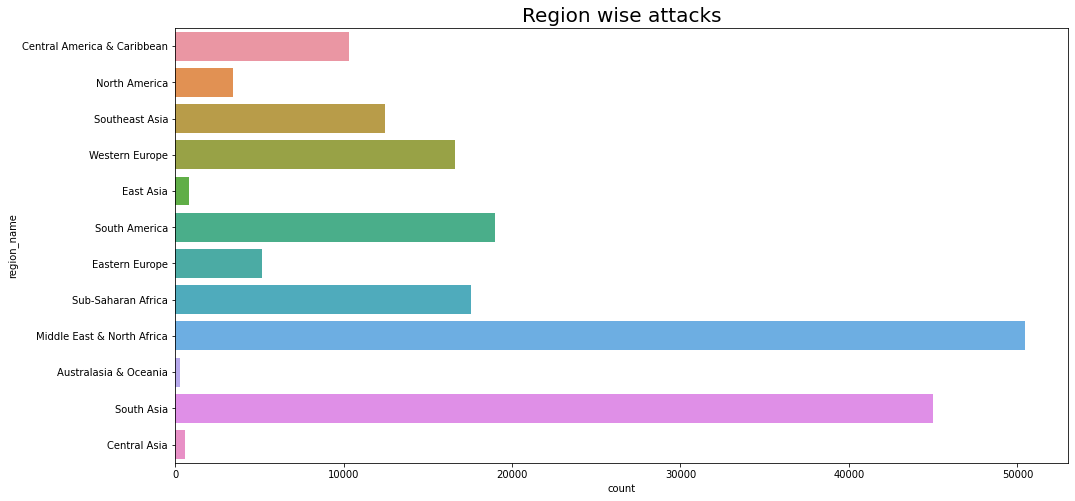

In [16]:
# to visualize number of attcks region wise 
plt.figure(figsize=(16,8))
sns.countplot(y='region_name',data=df)
plt.title('Region wise attacks',fontsize=20)

Middle East and North Africa is most vulnerable region to the terrorist attacks followed by South Asia and South America

In [17]:
# to get yearly attcks grouped by regions
df_2=df.groupby(['year','region_name']).size().reset_index().pivot(columns='region_name',index='year',values=0)

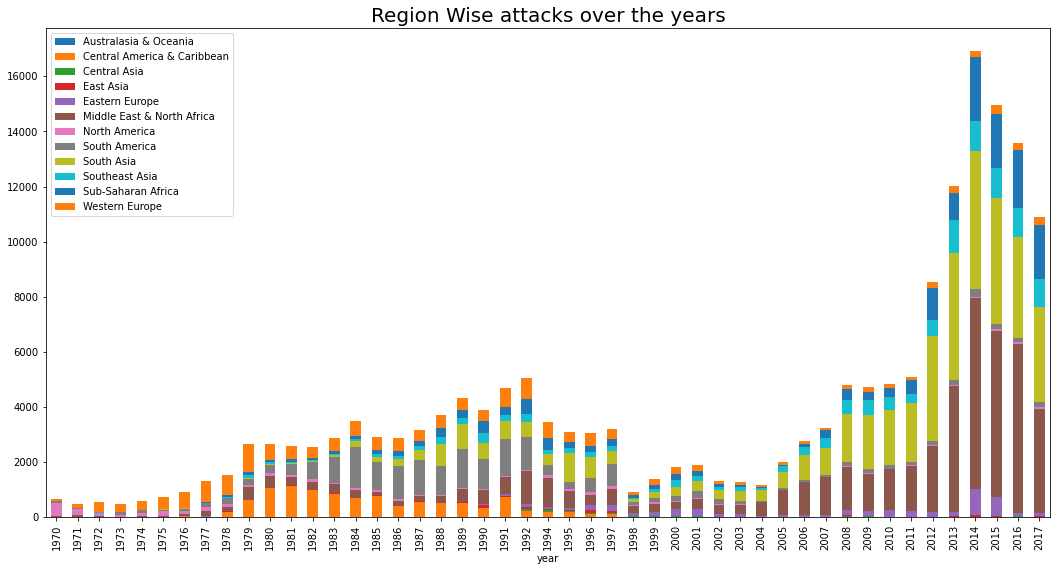

In [18]:
# to visualize above dataframe
df_2.plot(kind='bar',stacked=True,figsize=(18,9))
plt.title('Region Wise attacks over the years',fontsize=20)
plt.legend(loc=2,prop={'size':10})